# Correlation and variance threshold

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [11]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


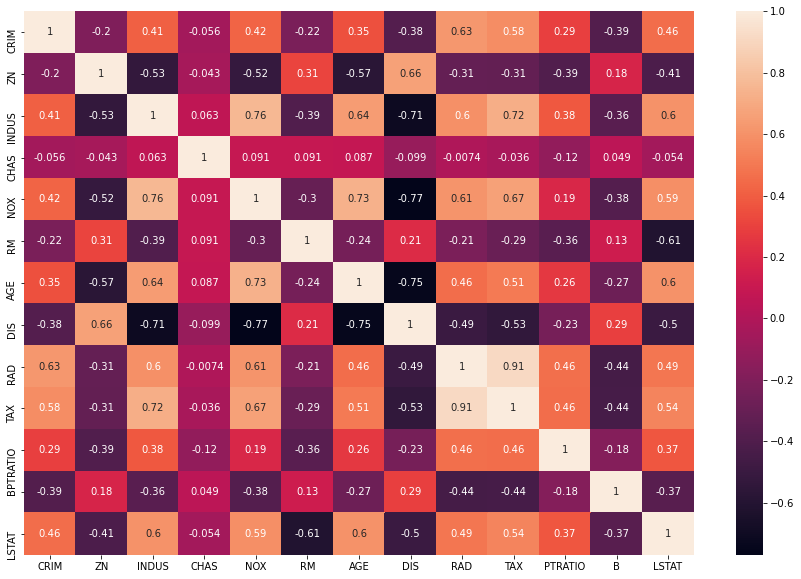

In [12]:
CorrMat = df.corr()

plt.figure(figsize = (15,10))

sns.heatmap(CorrMat, annot=True)

In [13]:
from sklearn.feature_selection import VarianceThreshold #Understand from sklearn documentation
df["MyNewCol"] = 100

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MyNewCol
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,100
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,100
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,100
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,100
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,100


In [15]:
VarThresh = VarianceThreshold(threshold=5)
VarThresh.fit(df)
VarThresh.get_support()

array([ True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False])

In [5]:
#Chi square - Anova F-value

In [27]:
#iris data
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import numpy as np


iris = load_iris()


X = iris.data
y = iris.target


X = X.astype(int)


chi2_selector = SelectPercentile(chi2)
kBest = chi2_selector.fit_transform(X, y)


chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_)), columns=['feature', 'score'])
chi2_scores




# In[38]:


print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])


number of original features: 4
number of reduced features: 1


In [28]:
np.asarray(iris.feature_names)[chi2_selector.get_support()]

array(['petal length (cm)'], dtype='<U17')

In [29]:
chi2_scores

,feature,score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


# Information Gain

In [34]:
from sklearn.feature_selection import mutual_info_classif
Data = pd.read_csv("C:\\Users\\amanr\\OneDrive\\Desktop\\insurance.csv")
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
features = Data[['age', 'bmi','charges']] #continiuos
target = Data[['region']] #categorical
feature_scores = mutual_info_classif(features,target, random_state=0)
feature_scores

C:\Users\amanr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.00055504, 0.18958508, 0.07632417])